# Soft_computing Coding Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Taking input from user for number of input neurons,output neurons,number of training and testing patterns.

In [2]:
## Inputing the number of neurons in input and output layer
def n_neurons():
    n_x=int(input('No. Of Input neurons:'))
    n_y=int(input('No. Of Output neurons:'))
    return n_x,n_y

In [3]:
## Inputing number of patterns for training and testing
def n_patterns():
    n_train=int(input('No. Of Training patterns:'))
    n_test=int(input('No. Of Testing patterns:'))
    return n_train,n_test

## Creating Neural Network Model

### Defining Activation Functions

# Activation Functions which will be used:
   1. For Hidden Layer: Log Sigmoid function
   2. For Output Layer: linear transfer function
   

In [4]:
def sigmoid(a,U):
    return 1/(1+np.exp(-a*U))

### Defining Weight and Bias Matrix

Defining Random Weight Matrices and the Biases:
1. V - connection weights between input layer and hidden layer
2. W - connection weights between hidden layer and output layer

In [5]:
def weight_matrix(n_neurons):
    n_inp=n_neurons[0]
    n_hidden=n_neurons[1]
    n_out=n_neurons[2]
    V = np.random.randn(n_inp,n_hidden)
    b1 = np.zeros((n_hidden,1))
    W = np.random.randn(n_hidden,n_out)
    b2 = np.zeros((n_out,1))
    return V,b1,W,b2

### Forward Propagation

In [6]:
def forward_prop(a,inputs,params):
    a1=a
    a2=a
    V=params['V']
    b1=params['b1']
    W=params['W']
    b2=params['b2']       
    
    I1=np.dot(V.T,inputs)+b1.T
    O1=sigmoid(a1,I1)[0]
    
    I2=np.dot(W.T,O1)+b2.T
    O2=I2[0]
    
    return I1,O1,I2,O2

### Back Propagation

In [7]:
def back_prop(constant,inputs,forward,target,W,n_neurons):
    inputs=inputs
    a2=constant
    a1=constant
    I1=forward[0]
    O1=forward[1]
    I2=forward[2]
    O2=forward[3]
    T=target
    W=W
    n_i=n_neurons[0]
    n_h=n_neurons[1]
    n_o=n_neurons[2]
    
    x=[]
    for k in range(n_o):
        x.append(list((O2[k]-T[k])*O1))
    del_W=np.array(x).T
    
    x=[]
    for k in range(n_o):
        x.append((O2[k]-T[k]))
    del_b2=np.array(x).reshape(1,1)
    
    del_V=[]
    for i in range(n_i):
        y=[]
        for j in range(n_h):
            e_v=0
            for k in range(n_o):
                e_v+=(O2[k]-T[k])*W[j][k]*a1*O1[j]*(1-O1[j])*inputs[i]
            y.extend([e_v/2])
        del_V.append(y)
    
    x=[]
    for j in range(n_h):
        e_b1=0
        for k in range(n_o):
            e_b1+=(O2[k]-T[k])*a1*O1[j]*(1-O1[j])
        x.append([e_b1/2])
    del_b1=np.array(x)
    
    
    return del_W,del_b2,np.array(del_V),del_b1


### Reading Dataset and Splitting into Train and Test

# The Dataset consists 156 rows with each training pattern consisting of 6 inputs and 1 outputs is happiness score

In [8]:
df=pd.read_csv('WHO_Happyness.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
df.shape
### We have total of 156 rows

(156, 9)

In [10]:
df.drop('Overall rank',axis=1)
print(df)
df.shape

     Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1  

(156, 9)

In [11]:
df = df[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]

In [12]:
from sklearn.utils import shuffle
shuffled_df = shuffle(df)

In [13]:
train_size,test_size=n_patterns()
train=shuffled_df.head(train_size)
test=shuffled_df.tail(test_size)
print('Training Data Shape:',train.shape,'Test Data Shape: ',test.shape)

No. Of Training patterns:120
No. Of Testing patterns:36
Training Data Shape: (120, 7) Test Data Shape:  (36, 7)


In [14]:

n_inputs,n_outputs=n_neurons()

No. Of Input neurons:6
No. Of Output neurons:1


## Driver Code

0 epoch ===> rmse_error : 1.2911391864485335
5 epoch ===> rmse_error : 0.8398648553207204
10 epoch ===> rmse_error : 0.7213565601945658
15 epoch ===> rmse_error : 0.6875056359690195
20 epoch ===> rmse_error : 0.6678399419709953
25 epoch ===> rmse_error : 0.6508177813979196
30 epoch ===> rmse_error : 0.6359304295251431
35 epoch ===> rmse_error : 0.623673733082042
40 epoch ===> rmse_error : 0.6140710350573434
45 epoch ===> rmse_error : 0.6066061357719087
50 epoch ===> rmse_error : 0.6006237209256509
55 epoch ===> rmse_error : 0.5956032889791789
60 epoch ===> rmse_error : 0.5912135761017999
65 epoch ===> rmse_error : 0.5872659502433196
70 epoch ===> rmse_error : 0.5836563833047645
75 epoch ===> rmse_error : 0.5803247414978855
80 epoch ===> rmse_error : 0.5772316813742929
85 epoch ===> rmse_error : 0.574347131107714
90 epoch ===> rmse_error : 0.5716452449661382
95 epoch ===> rmse_error : 0.5691026062894241
100 epoch ===> rmse_error : 0.5666978605838557
105 epoch ===> rmse_error : 0.5644118

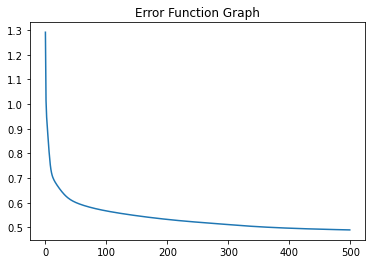

learning rate = 0.1 & no. of hidden neurons = 5 RMSE : 0.48973104605846207


In [29]:
n_hidden=5
n_epochs=500
n_neurons=[n_inputs,n_hidden,n_outputs]
params=weight_matrix(n_neurons)
err=[]
for epoch in range(n_epochs):
    error=0
    for index, row in train.iterrows():
        X=np.array(row.values[1:])
        Y=np.array(row.values[:1])
        net_params={'V':params[0],'b1':params[1],'W':params[2],'b2':params[3]}
        forward=forward_prop(3,X,net_params)
        error+=sum(((forward[3]-Y))**2)
        grads=back_prop(1,X,forward,Y,net_params['W'],n_neurons)
        W=net_params['W']-0.1*grads[0]
        b2=net_params['b2']-0.1*grads[1]
        V=net_params['V']-0.1*(grads[2])
        b1=net_params['b1']-0.1*grads[3]
        params=[V,b1,W,b2]
    rmse=(error/120)**0.5
    err.append(rmse)
    if(epoch%5==0):
        print('{} epoch ===> rmse_error : {}'.format(epoch,rmse,n_hidden))
plt.figure()
plt.plot(np.arange(),err)
plt.title('Error Function Graph')
plt.show()
print('learning rate = 0.1 & no. of hidden neurons = '+str(n_hidden) + ' RMSE : '+ str(err[-1]));

### Optimising the number of hidden layer neurons

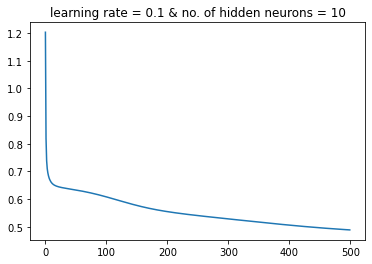

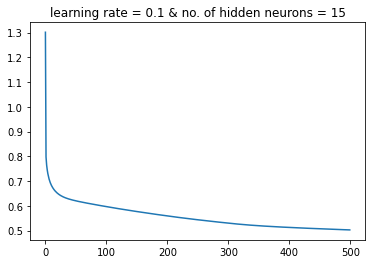

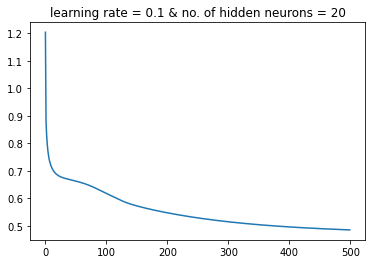

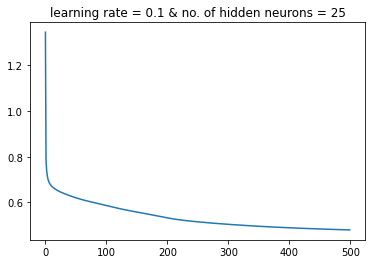

In [16]:
hidden=[10,15,20,25]
n_epochs=500

for n_hidden in hidden:
    n_neurons=[n_inputs,n_hidden,n_outputs]
    params=weight_matrix(n_neurons)
    err=[]
    for epoch in range(n_epochs):
        error=0
        for index, row in train.iterrows():
            X=np.array(row.values[1:])
            Y=np.array(row.values[:1])
            net_params={'V':params[0],'b1':params[1],'W':params[2],'b2':params[3]}
            forward=forward_prop(1,X,net_params)
            #predicted=np.where(forward[3]>0.5,1,0)
            error+=sum(((forward[3]-Y)/1)**2)
            grads=back_prop(1,X,forward,Y,net_params['W'],n_neurons)
            W=net_params['W']-0.1*grads[0]
            b2=net_params['b2']-0.1*grads[1]
            V=net_params['V']-0.1*grads[2]
            b1=net_params['b1']-0.1*grads[3]
            params=[V,b1,W,b2]
        rmse=(error/120)**0.5
        err.append(rmse)
      
    plt.figure()
    plt.plot(np.arange(500),err)
    plt.title('learning rate = 0.1 & no. of hidden neurons = '+str(n_hidden));
    plt.show()

From the above figures, the number of hidden neurons = 20 , provides the best minimum RMSE with learning rate=0.1 and number of iterations=500.

### Optimising the learning rate

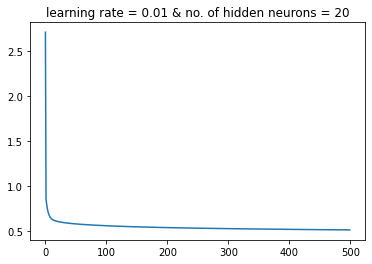

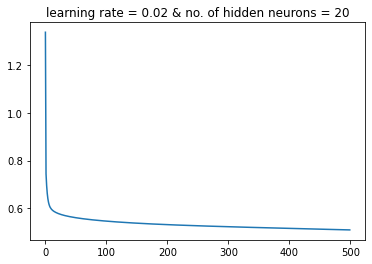

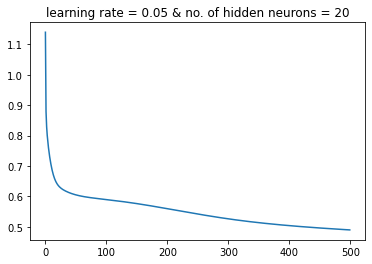

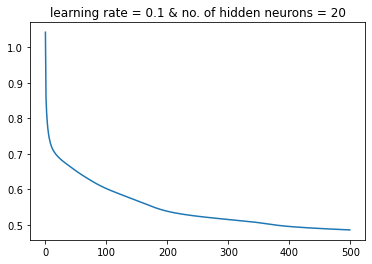

In [18]:
etas=[0.01,0.02,0.05,0.1]
n_epochs=500
n_hidden=20

for eta in etas:
    n_neurons=[n_inputs,n_hidden,n_outputs]
    params=weight_matrix(n_neurons)
    err=[]
    for epoch in range(n_epochs):
        error=0
        for index, row in train.iterrows():
            X=np.array(row.values[1:])
            Y=np.array(row.values[:1])
            net_params={'V':params[0],'b1':params[1],'W':params[2],'b2':params[3]}
            forward=forward_prop(1,X,net_params)
            error+=sum(((forward[3]-Y)/1)**2)
            grads=back_prop(1,X,forward,Y,net_params['W'],n_neurons)
            W=net_params['W']-eta*grads[0]
            b2=net_params['b2']-eta*grads[1]
            V=net_params['V']-eta*grads[2]
            b1=net_params['b1']-eta*grads[3]
            params=[V,b1,W,b2]
        rmse=(error/120)**0.5
        err.append(rmse)
        #print('{} epoch ===> rmse_error : {} , {}'.format(epoch,tot_error,n_hidden))
    plt.figure()
    plt.plot(np.arange(500),err)
    plt.title('learning rate = '+str(eta)+' & no. of hidden neurons = 20');
    plt.show()

## Defining Final Model

epoch 0 =====> rmse_error : 1.2002988625017228
epoch 20 =====> rmse_error : 0.6613719112173271
epoch 40 =====> rmse_error : 0.6203574435566004
epoch 60 =====> rmse_error : 0.5989399593123007
epoch 80 =====> rmse_error : 0.5855800039315833
epoch 100 =====> rmse_error : 0.5760439603552835
epoch 120 =====> rmse_error : 0.5685884223028674
epoch 140 =====> rmse_error : 0.5625122852645714
epoch 160 =====> rmse_error : 0.557474449467312
epoch 180 =====> rmse_error : 0.5532473448026101
epoch 200 =====> rmse_error : 0.5496520172952014
epoch 220 =====> rmse_error : 0.5465463654607828
epoch 240 =====> rmse_error : 0.5438209658545162
epoch 260 =====> rmse_error : 0.5413934568885348
epoch 280 =====> rmse_error : 0.5392023492217533
epoch 300 =====> rmse_error : 0.5372016581369881
epoch 320 =====> rmse_error : 0.5353567797186864
epoch 340 =====> rmse_error : 0.5336414773250346
epoch 360 =====> rmse_error : 0.5320357043081492
epoch 380 =====> rmse_error : 0.5305240198255251
epoch 400 =====> rmse_error

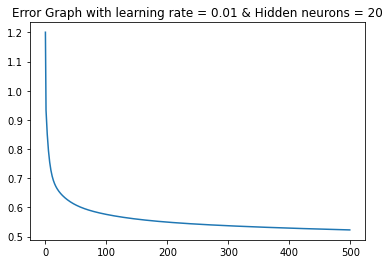

RMSE of the above model : 0.5229604520778751


In [25]:
# defining the hyperparameters
n_hidden=20
n_epochs=500
eta=0.01

#creating model
n_neurons=[n_inputs,n_hidden,n_outputs]
params=weight_matrix(n_neurons)
err=[]
for epoch in range(n_epochs):
    error=0
    for index, row in train.iterrows():
        X=np.array(row.values[1:])
        Y=np.array(row.values[:1])
        net_params={'V':params[0],'b1':params[1],'W':params[2],'b2':params[3]}
        forward=forward_prop(1,X,net_params)
        error+=sum(((forward[3]-Y)/1)**2)
        grads=back_prop(1,X,forward,Y,net_params['W'],n_neurons)
        W=net_params['W']-eta*grads[0]
        b2=net_params['b2']-eta*grads[1]
        V=net_params['V']-eta*grads[2]
        b1=net_params['b1']-eta*grads[3]
        params=[V,b1,W,b2]
    rmse=(error/120)**0.5
    err.append(rmse)
    if(epoch%20==0):
        print('epoch {} =====> rmse_error : {}'.format(epoch,rmse))
plt.figure()
plt.plot(np.arange(500),err)
plt.title('Error Graph with learning rate = 0.01 & Hidden neurons = 20')
plt.show()
print('RMSE of the above model : '+ str(err[-1]));

In [26]:
### The Final Model Parameters are stored in 'params'
print(params)

[array([[ 0.03481503,  0.40807977,  0.35732239,  0.80545808,  1.45525294,
        -0.12625776,  1.32813337,  2.75395778, -2.48051117, -0.59068138,
         0.76669717, -0.39650059,  0.0950297 ,  1.75458938,  0.25291223,
         1.46798264, -0.43166618, -0.67387403,  0.49456281, -0.36948269],
       [-0.10447295, -0.29348669, -1.23337157, -1.50890628, -0.67477486,
         0.31514299, -0.67180298,  0.31053309,  0.32427771,  0.05577539,
        -0.92145613,  1.45731297,  0.49259753, -0.89011334,  0.13577681,
        -0.75904517, -0.53907863, -1.11464671,  0.42327372,  1.00602133],
       [-0.31434561,  0.29752487,  0.09684149, -0.44656418,  0.92396653,
        -0.31978173,  1.15116697, -2.68836549, -0.47463724,  1.48296206,
         0.27931324, -0.37393738,  0.14784791, -1.35559965, -1.30697758,
        -0.93779932,  1.14898164, -2.34726615, -0.79757831, -0.27622981],
       [-1.57647823,  1.655691  ,  1.49872508,  1.78567396, -0.65983315,
         1.16821541, -0.73601099,  0.58751276, 

### Predicting The Results

In [46]:
V=params[0]
b1=params[1]
W=params[2]
b2=params[3]

mse_error=np.zeros((1,))
for index, row in test.iterrows():
    X=np.array(row.values[1:])
    Y=np.array(row.values[:1])
    net_params={'V':V,'b1':b1,'W':W,'b2':b2}
    forward=forward_prop(1,X,net_params)
    mse_error+=((Y-forward[3])**2)
RMSE_error= (mse_error/36)**0.5

In [47]:
print(RMSE_error)

[0.47531993]


# in above ANN program have very less 0.4753 error 